In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\balamurugan\Downloads\Day 68 country_wise_latest.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [3]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [4]:
df.shape

(187, 15)

In [5]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of          Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  R

In [7]:
Total_countries = df['Country/Region'].nunique()
print("Total Countries",Total_countries)

Total Countries 187


In [8]:
confirmed_cases = df['Confirmed'].sum()
print("Total Cases",confirmed_cases)

Total Cases 16480485


In [9]:
Deaths = df['Deaths'].sum()
print("Total Deaths",Deaths)

Total Deaths 654036


In [10]:
Recover = df['Recovered'].sum()
print("Total Recovered",Recover)

Total Recovered 9468087


In [11]:
Active = df['Active'].sum()
print("Total Active Cases",Active)

Total Active Cases 6358362


In [12]:
Re = (Recover/confirmed_cases)*100
print("Percentage of recover: {:.2f}%".format (Re))

Percentage of recover: 57.45%


In [13]:
Mortality_Death_Rate = (Deaths/confirmed_cases)*100
print("Percentage of Death Rate: {:.2f}%".format (Mortality_Death_Rate))

Percentage of Death Rate: 3.97%


In [14]:
Who = df['WHO Region'].nunique()
print("Total Global",Who)

Total Global 6


In [15]:
mac = df.loc[df['Confirmed'].idxmax(), 'Country/Region']
print("Most confirmeg cases in a country:",mac)

Most confirmeg cases in a country: US


In [16]:
mrc = df.loc[df['Recovered'].idxmax(), 'Country/Region']
print("Most Recovery in a country:",mrc)

Most Recovery in a country: Brazil


In [17]:
df['Recovery Rate'] = (df['Recovered']/df['Confirmed']) * 100
df['Recovery Rate'].replace([float('inf'),-float('inf')],0,inplace=True)
df['Recovery Rate'].fillna(0,inplace=True)

hrr = df.loc[df['Recovery Rate'].idxmax(), 'Country/Region']
print("Recovery Rate Percent in Country:",hrr)

Recovery Rate Percent in Country: Dominica


C:\Users\balamurugan\AppData\Local\Temp\ipykernel_1352\2223980554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Recovery Rate'].replace([float('inf'),-float('inf')],0,inplace=True)
C:\Users\balamurugan\AppData\Local\Temp\ipykernel_1352\2223980554.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [18]:
df['Mortality Rate'] = (df['Deaths']/df['Confirmed']) * 100
df['Mortality Rate'].replace([float('inf'),-float('inf')],0,inplace=True)
df['Mortality Rate'].fillna(0,inplace=True)

drr = df.loc[df['Mortality Rate'].idxmax(), 'Country/Region']
print("Death Rate Percent in Country:",drr)

Death Rate Percent in Country: Yemen


C:\Users\balamurugan\AppData\Local\Temp\ipykernel_1352\2954796963.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mortality Rate'].replace([float('inf'),-float('inf')],0,inplace=True)
C:\Users\balamurugan\AppData\Local\Temp\ipykernel_1352\2954796963.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

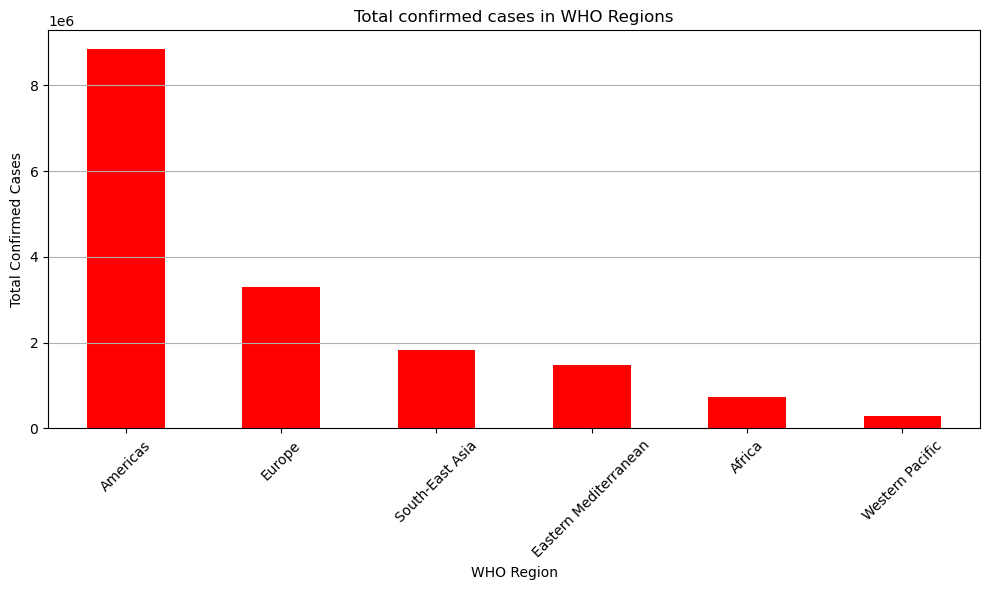

In [20]:
region_confirmed = df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
region_confirmed.plot(kind='bar', color='Red')
plt.title('Total confirmed cases in WHO Regions')
plt.xlabel('WHO Region')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\balamurugan\AppData\Local\Temp\ipykernel_1352\2737924326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region', y='Active', data=top, palette='Reds_r')


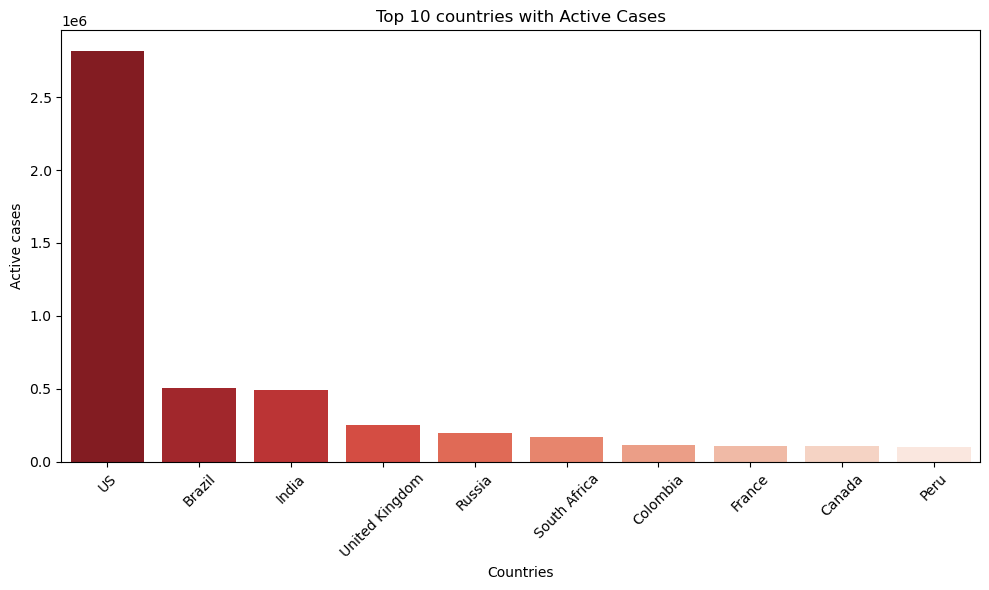

In [21]:
top = df.sort_values(by='Active', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='Country/Region', y='Active', data=top, palette='Reds_r')
plt.title('Top 10 countries with Active Cases')
plt.xlabel('Countries')
plt.ylabel('Active cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

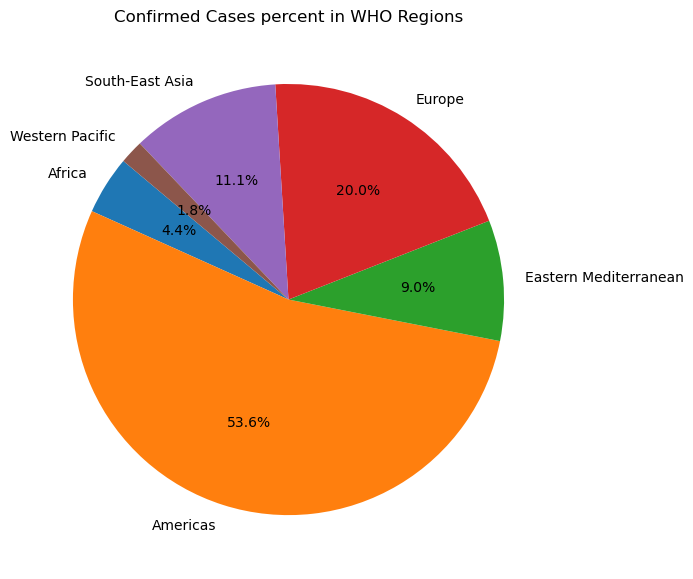

In [22]:
pie = df.groupby('WHO Region')['Confirmed'].sum()
plt.figure(figsize=(7,7))
plt.pie(pie, labels=pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Confirmed Cases percent in WHO Regions')
plt.tight_layout()
plt.show()


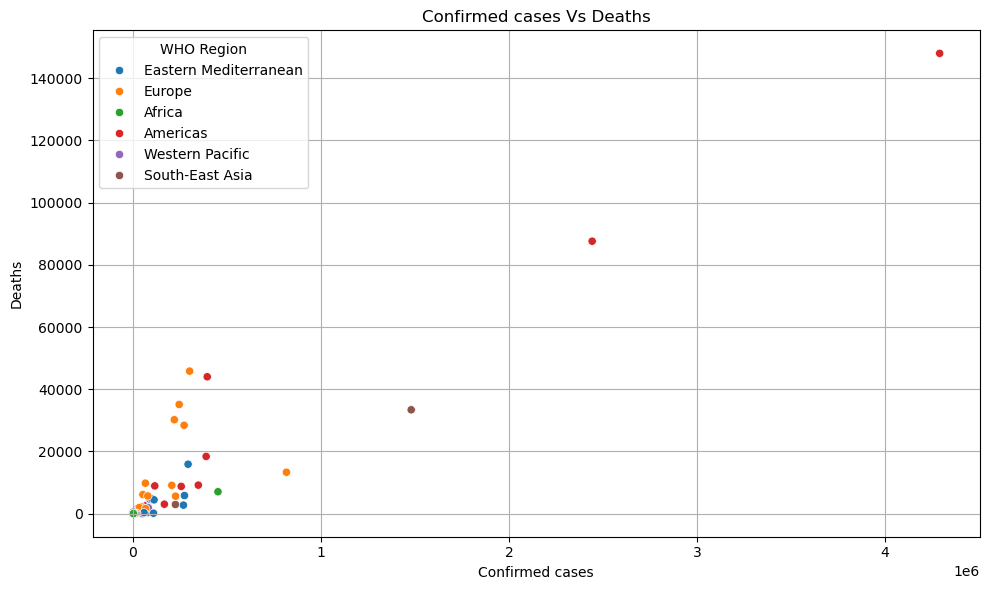

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Confirmed', y='Deaths', hue='WHO Region', data=df)
plt.title('Confirmed cases Vs Deaths')
plt.xlabel('Confirmed cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

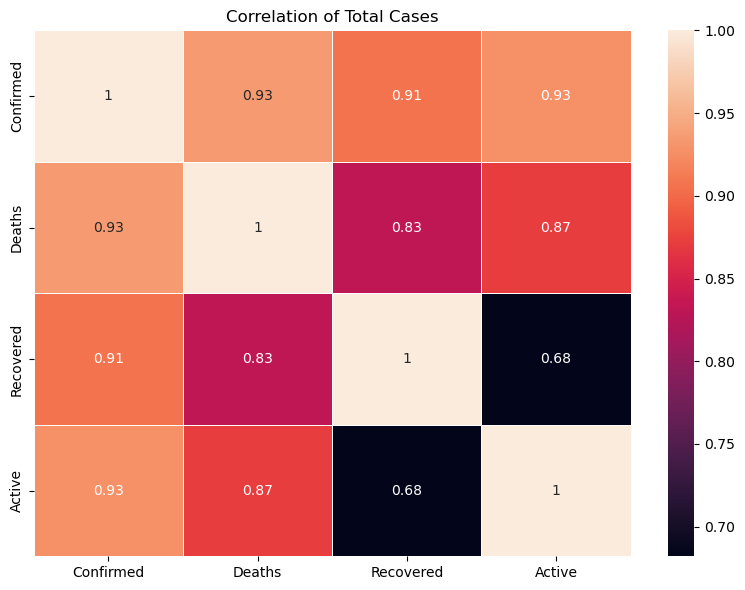

In [24]:
corre = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corre, annot=True, linewidth=0.5)
plt.title('Correlation of Total Cases')
plt.tight_layout()
plt.show()

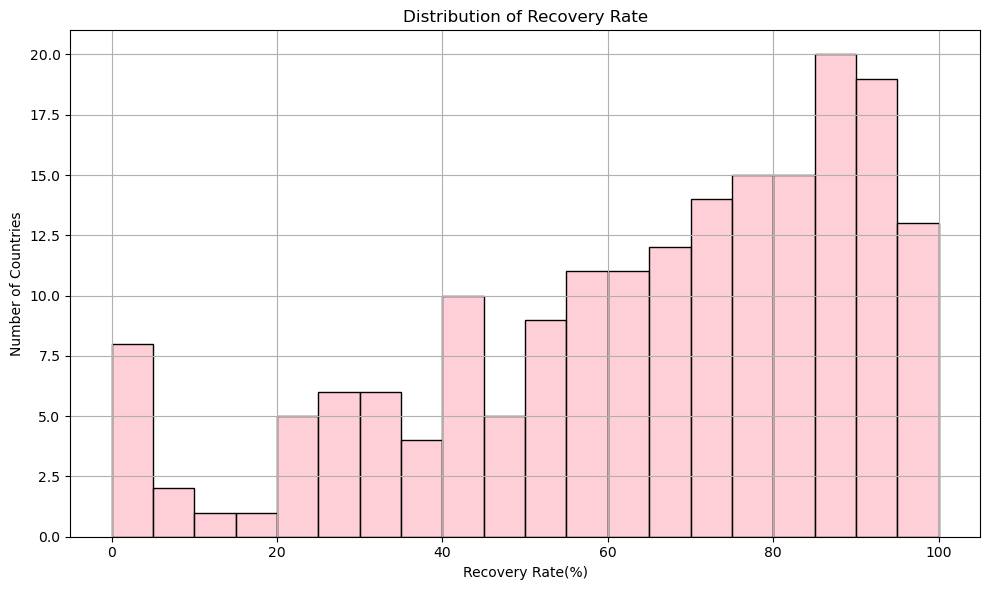

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['Recovery Rate'], bins=20, color='pink')
plt.title('Distribution of Recovery Rate')
plt.xlabel('Recovery Rate(%)')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.tight_layout()
plt.show()

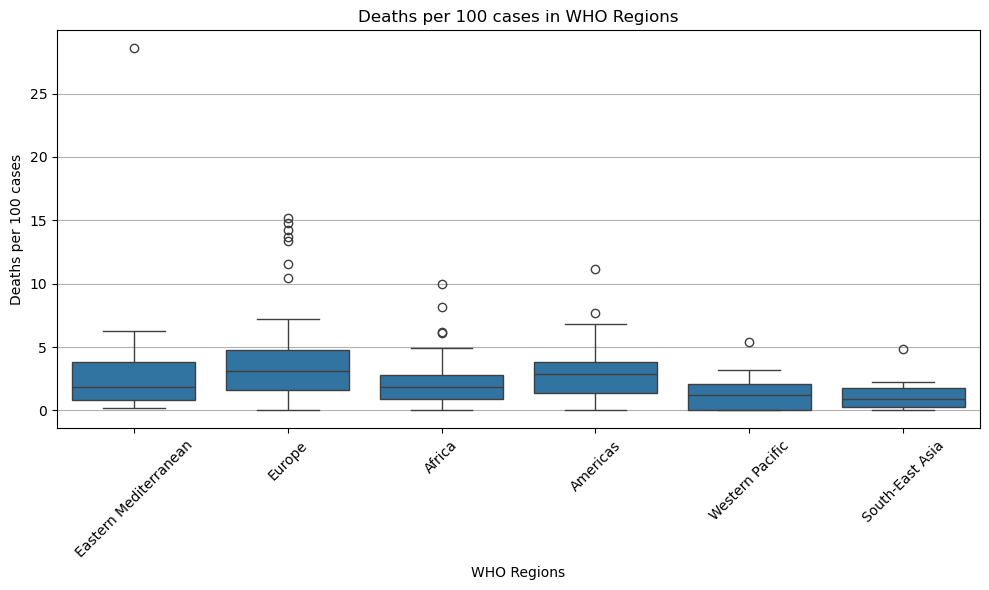

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='WHO Region', y='Deaths / 100 Cases', data=df)
plt.title('Deaths per 100 cases in WHO Regions')
plt.xlabel('WHO Regions')
plt.ylabel('Deaths per 100 cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

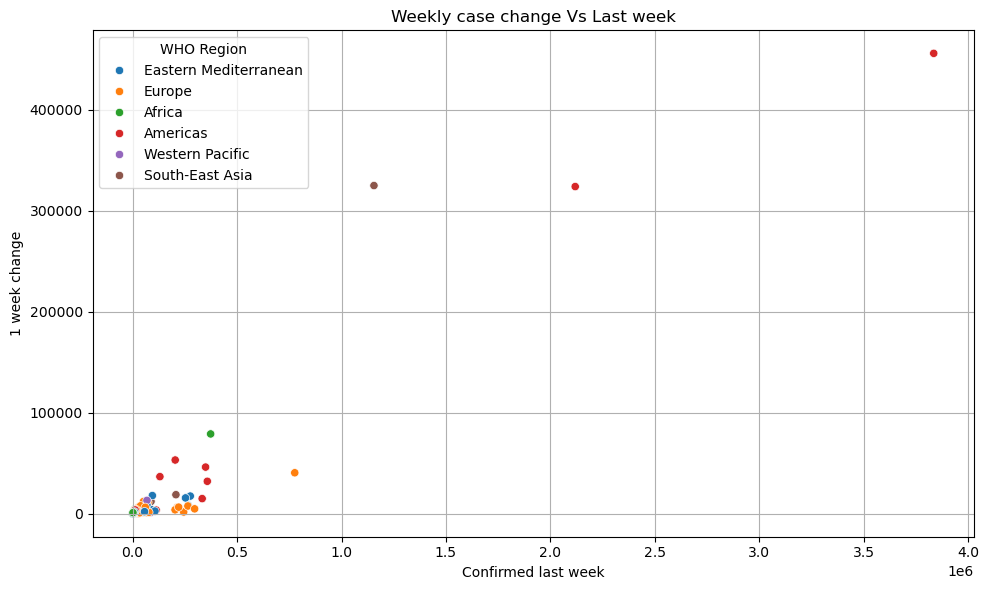

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Confirmed last week', y='1 week change', hue='WHO Region')
plt.title('Weekly case change Vs Last week')
plt.xlabel('Confirmed last week')
plt.ylabel('1 week change')
plt.grid(True)
plt.tight_layout()
plt.show()

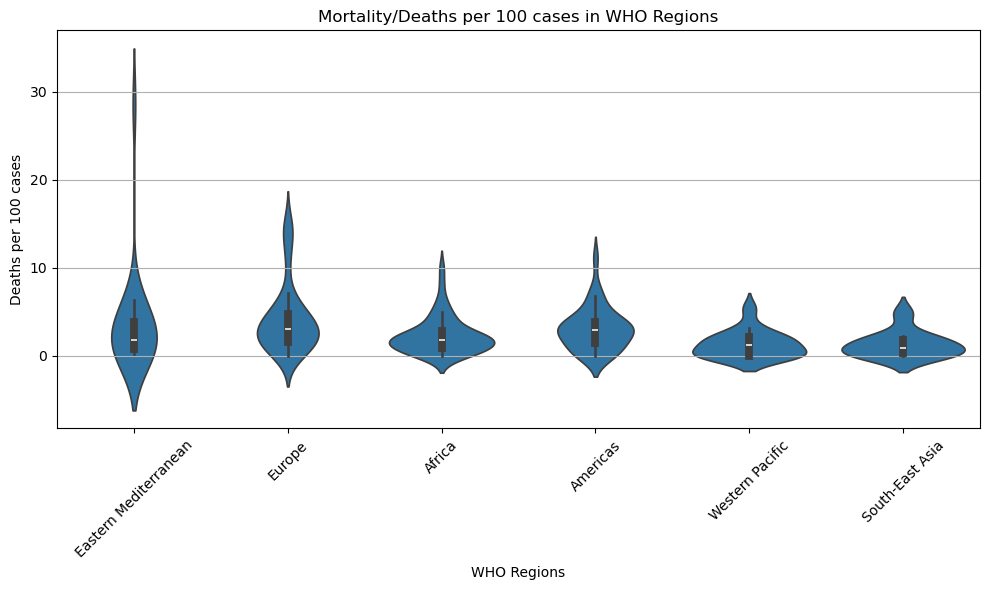

In [28]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='WHO Region', y='Deaths / 100 Cases') 
plt.title('Mortality/Deaths per 100 cases in WHO Regions')
plt.xlabel('WHO Regions')
plt.ylabel('Deaths per 100 cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [29]:
import dash 
print("dash is installed correctly")

dash is installed correctly


In [30]:
import jupyter_dash

In [31]:
chart1 = px.bar(df.groupby('WHO Region')['Confirmed'].sum().reset_index(),
                x='WHO Region', y='Confirmed', title='Total Confirmed Cases by WHO Regions')

chart2 = px.bar(df.sort_values('Active', ascending=False).head(10),
                x='Country/Region', y='Active', title='Top 10 Countries with Active Cases')

chart3 = px.pie(df, names='WHO Region', values='Confirmed', title='Confirmed Cases Distribution by Region')

chart4 = px.scatter(df, x='Confirmed', y='Deaths', color='WHO Region', title='Confirmed Cases Vs Deaths')

chart5 = px.histogram(df, x='Recovery Rate', nbins=30, title='Recovery rate Distribution across Countries')

chart6 = px.box(df, x='WHO Region', y='Mortality Rate', title='Mortality Rate by Region')

correlation = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()
chart7 = go.Figure(data=go.Heatmap(z=correlation.values, x=correlation.columns, y=correlation.columns, colorscale='Viridis'))
chart7.update_layout(title='Correlation Heatmap of Key Metrics')

chart8 = px.box(df, x='WHO Region', y='Deaths / 100 Cases', title='Deaths per 100 Cases by Region')

if 'Confirmed last week' in df.columns and '1 week change' in df.columns:
    chart9 = px.scatter(df, x='Confirmed last week', y='1 week change',
                        color='WHO Region', title='Weekly change in Confirmed Cases')
else:
    chart9 = go.Figure()
    chart9.update_layout(title='Weekly Change Data Not Available')

chart10 = px.violin(df, x='WHO Region', y='Mortality Rate', box=True, title='Mortality Rate Violin Plot by Region')



In [33]:
from dash import html, dcc
from jupyter_dash import JupyterDash
app = JupyterDash(__name__)

app.layout = html.Div([
    html.Div([
        html.H1("COVID-19 Data Dashboard", style={'textAlign': 'center', 'fontsize': '36px', 'marginTop': '20px', 'marginBottom': '20px'}),
        
        dcc.Graph(figure=chart1),
        dcc.Graph(figure=chart2),
        dcc.Graph(figure=chart3),
        dcc.Graph(figure=chart4),
        dcc.Graph(figure=chart5),
        dcc.Graph(figure=chart6),
        dcc.Graph(figure=chart7),
        dcc.Graph(figure=chart8),
        dcc.Graph(figure=chart9),
        dcc.Graph(figure=chart10),

        html.P("Built by BALA", style={'textAlign': 'center', 'margintop': '30px', 'fontStyle': 'italic', 'color': 'black'})
    ], style={'padding': '20px'})
])




In [34]:
if __name__  ==  '__main__':
    app.run(debug=True, port=8051)
